In [1]:
from matplotlib import pyplot as plt
import numpy as np
from my_utils import *

In [2]:
samples = unpickle("random_number_check_data/rand_data.pickle")

loading from random_number_check_data/rand_data.pickle


In [3]:
data = np.array(samples)

In [4]:
bits = np.array([0,0,0,0,0,0,0,0])

for num in data:
  for i in range(0,8):
    bits[i] += (num &(1<<i))>>i
    
bits = bits*1/len(data)

  

(0, 1)

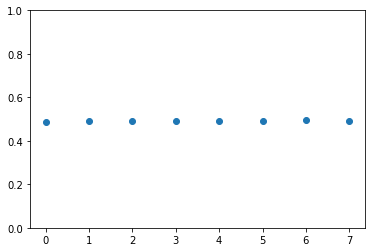

In [5]:

plt.scatter(range(0,8),bits)
plt.ylim(0,1)

In [6]:
x= data
y = np.concatenate((data[1:],data[0]),axis=None)

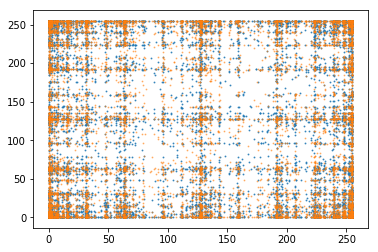

In [7]:
plt.scatter(x,y,alpha=0.8,s=0.8)
plt.scatter(y,x,alpha=0.5,s=0.8)

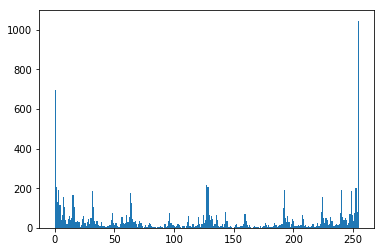

In [8]:
plt.hist(data,bins=range(0,256))

print()

In [9]:
cov = np.array([0.]*7)
for num in data:
  a = num&1
  for i in range(1,8):
    b = (num & (1<<i))>>i
    cov[i-1] += (float(a)-0.5)*(float(b)-0.5)    
    
cov/=len(data)

Text(0.5,1,'n-nearest neighbor covariance')

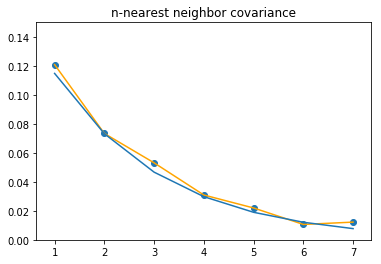

In [10]:
x= np.array(range(1,8))
plt.plot(x,cov,color="orange")
plt.scatter(x,cov)
plt.plot(x,0.18*np.exp(-0.45*x))
plt.ylim(0,0.15)
plt.title("n-nearest neighbor covariance")

In [15]:
import random
sim = []
for i in range(0,10000):
  num = 0
  a=random.randint(0,1)
  num += a
  for j in range(1,8):
    thresh =  0.18*np.exp(-0.45*j)
    b = 0
    if(random.random() >thresh):
      #b = int(1-a)
      b = random.randint(0,1)
    else:
      b = a
    num += int(b)<<j
  sim += [num]

sim = np.array(sim)
    
  

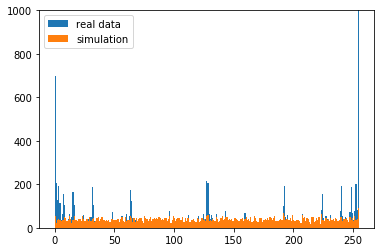

In [16]:
plt.hist(data,bins=range(0,256),label="real data")
plt.hist(sim,bins=range(0,256), label="simulation")
plt.ylim(0,1000)
plt.legend()
print()